# An experimental proof that the product of two gaussians is centered on the average of its terms

This is a mathematical non-proof that the product of two random variables with the same variance is distributed as a gaussian whose mean is equal to the average of the means of the original variables and whose variance is half the variance of both. First of all let's define what we need: import packages and define the gaussian function; then obtain the figure on which we are going to show the plots (gcf stands for "get current figure").

In [98]:
import matplotlib.pyplot as plt
import numpy as np

def gauss(x, mu, sigma):
    return np.exp(-0.5*((x-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)

Then, let's define a function that, given $\mu_2$ computes the pdf of $G(1)G(\mu_2)$, where $G(\mu)$ is a gaussian with mean $\mu$ and unitary variance.

In [114]:
def plot(mu2):
    mu2 += 1
    x = np.arange(0, 10, .1)
    y = gauss(x, 1, 1)*gauss(x, mu2, 1)
    # together with P(mu_1)P(mu_2) we show both P(mu_1) and P(mu_2)
    y1 = gauss(x, 1, 1)
    y2 = gauss(x, mu2, 1)
    M = np.max(y)*0.2
    mu = (1+mu2)/2
    label = f'$\\mu={mu}$'
    label1 = f'$\\mu_1=1$'
    label2 = f'$\\mu_2={mu2}$'
    arr = dict(facecolor='blue')
    plt.clf()
    plt.annotate('$\\mu_1 = 1$', xy = (1, 0.),
                 ha = 'center',
                 xytext = (1, M), arrowprops = arr)
    plt.annotate('$\\mu_2 = {}$'.format(mu2),
                 xy = (mu2, 0.), ha = 'center',
                 xytext = (mu2, M), arrowprops = arr)
    arr = dict(facecolor='orange')
    plt.annotate(f'$\\mu = {mu}$',
                 xy = (mu, M/0.2*0.95),
                 xytext = (mu, M/0.2*0.70),
                 arrowprops = arr, ha = 'center')
    plt.plot(x, y, label = label)
    # the normalization factor changes with mu. We then multiply the pdf by a factor such as
    # its height is constant and does not depend on mu_2
    plt.plot(x, y1/max(y1)*max(y), label = label1)
    plt.plot(x, y2/max(y2)*max(y), label = label2)
    plt.legend()
    plt.show()
    return plt

Then, use the function defined above to plot the product for various $\mu_2$

<IPython.core.display.Javascript object>


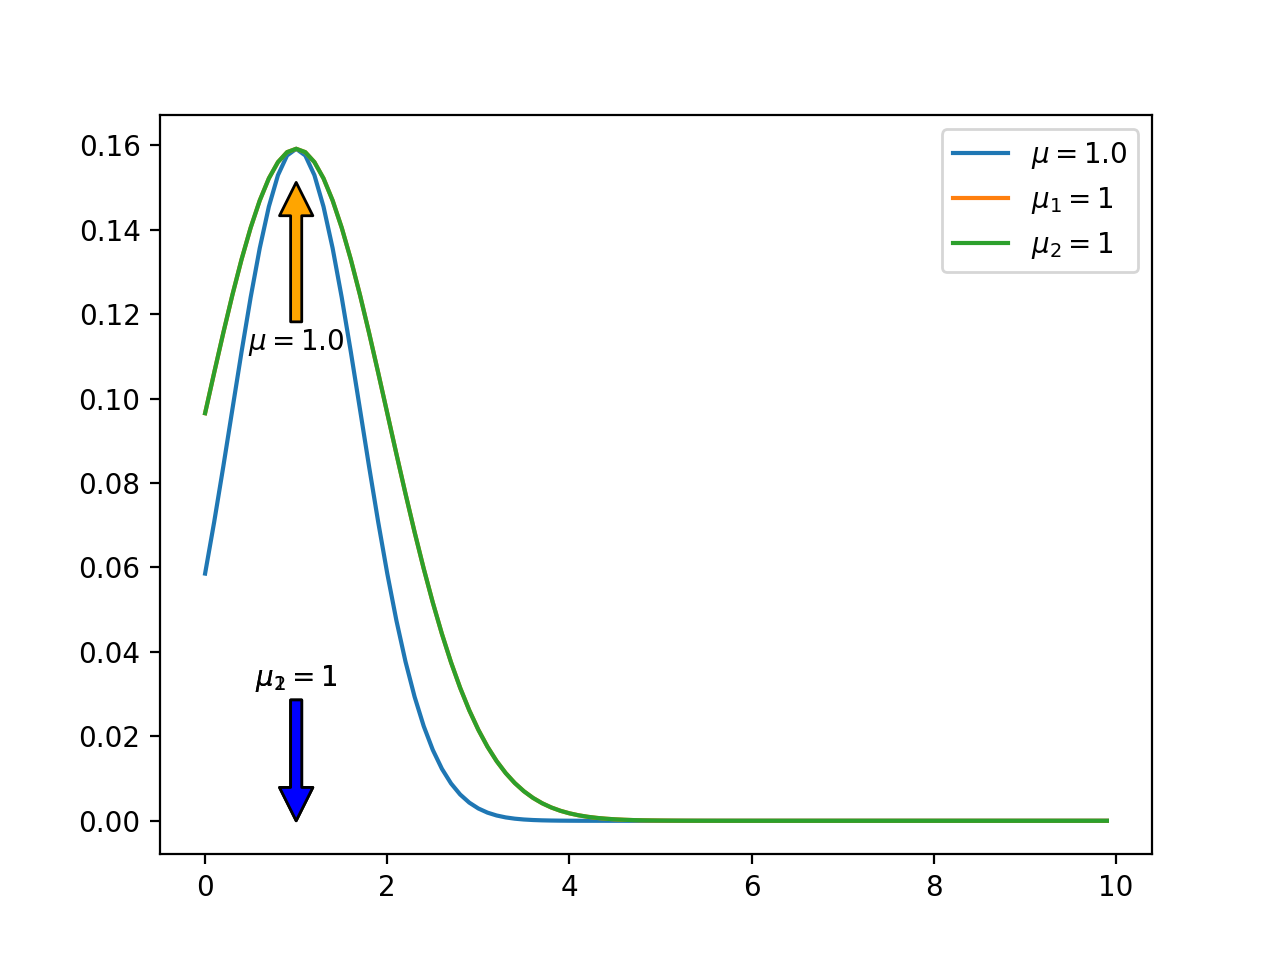

In [115]:
plot(0)
fig = plt.gcf()
import matplotlib.animation as animation
anim = animation.FuncAnimation(fig, plot, frames=10, interval = 1000)